# MBA class of 2025 admission prediction
Business problem: Classification problem used ML method to predict admission result.

In [4]:
# Import necesary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/MBA.csv')

In [6]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [7]:
df.drop('application_id', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         6194 non-null   object 
 1   international  6194 non-null   bool   
 2   gpa            6194 non-null   float64
 3   major          6194 non-null   object 
 4   race           4352 non-null   object 
 5   gmat           6194 non-null   float64
 6   work_exp       6194 non-null   float64
 7   work_industry  6194 non-null   object 
 8   admission      1000 non-null   object 
dtypes: bool(1), float64(3), object(5)
memory usage: 393.3+ KB


In [9]:
df.describe()

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


In [10]:
# get categorical columns only

categorical_columns = df.select_dtypes(include=['object', 'category'])

# List of unique value of each categorical columns

for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in gender: ['Female' 'Male']
Unique values in major: ['Business' 'Humanities' 'STEM']
Unique values in race: ['Asian' 'Black' nan 'Hispanic' 'White' 'Other']
Unique values in work_industry: ['Financial Services' 'Investment Management' 'Technology' 'Consulting'
 'Nonprofit/Gov' 'PE/VC' 'Health Care' 'Investment Banking' 'Other'
 'Retail' 'Energy' 'CPG' 'Real Estate' 'Media/Entertainment']
Unique values in admission: ['Admit' nan 'Waitlist']


In [11]:
# the distribution of target variable

distribution = df['admission'].value_counts()
print(distribution)

admission
Admit       900
Waitlist    100
Name: count, dtype: int64


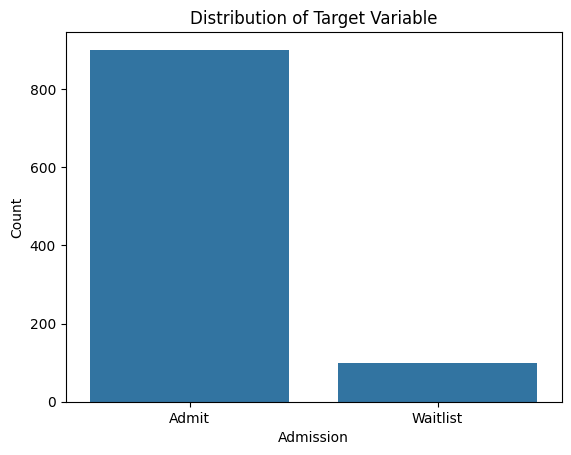

In [12]:
# plot the distribution of target variable

sns.countplot(x='admission', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Admission')
plt.ylabel('Count')
plt.show()

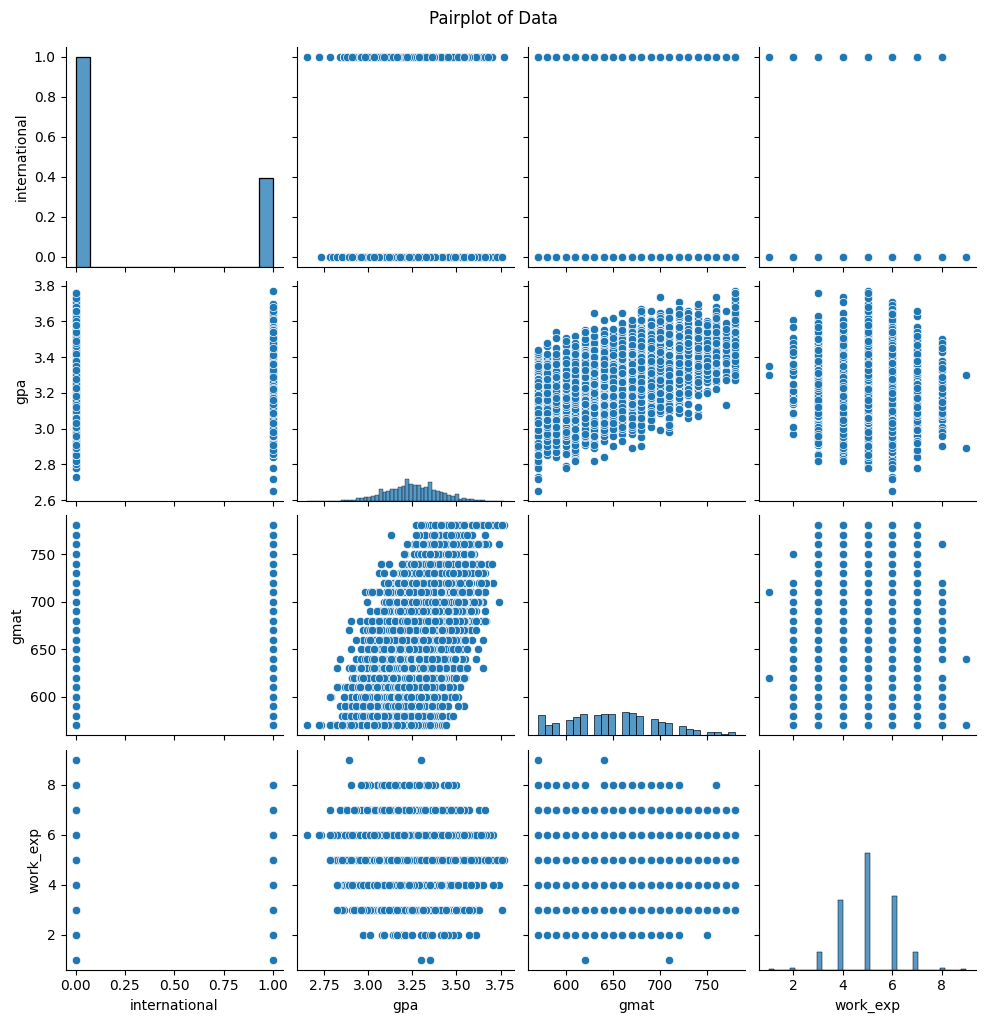

In [13]:
# pairplot for dataframe
data = df.drop('admission', axis=1)
sns.pairplot(data)
plt.suptitle('Pairplot of Data', y=1.02)
plt.show()

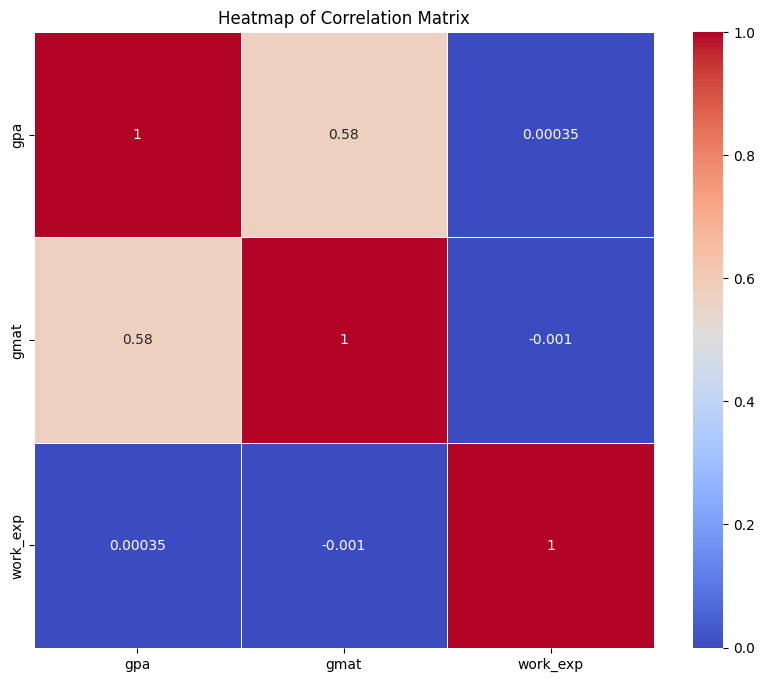

In [14]:
#Craeting Heatmap
# selecting onlu numerical columns

numeric_data = data.select_dtypes(include=['float64','int64'])

# correlation matix

corr = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm' , linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Data preparation

In [15]:
df.head()






,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [16]:
# Map 'male' to 1 and 'female' to 0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Check if the mapping worked correctly
print(df.head())

   gender  international   gpa       major      race   gmat  work_exp  \
0       0          False  3.30    Business     Asian  620.0       3.0   
1       1          False  3.28  Humanities     Black  680.0       5.0   
2       0           True  3.30    Business       NaN  710.0       5.0   
3       1          False  3.47        STEM     Black  690.0       6.0   
4       1          False  3.35        STEM  Hispanic  590.0       5.0   

           work_industry admission  
0     Financial Services     Admit  
1  Investment Management       NaN  
2             Technology     Admit  
3             Technology       NaN  
4             Consulting       NaN  


In [17]:
#Admission
# lets remove admission waitlist
df = df[df['admission'] != 'waitlist']

#Map 'Admit' to 1 and null or empty values to 0
df['admission'] = df['admission'].map({'Admit': 1}).fillna(0)

print(df.head())

   gender  international   gpa       major      race   gmat  work_exp  \
0       0          False  3.30    Business     Asian  620.0       3.0   
1       1          False  3.28  Humanities     Black  680.0       5.0   
2       0           True  3.30    Business       NaN  710.0       5.0   
3       1          False  3.47        STEM     Black  690.0       6.0   
4       1          False  3.35        STEM  Hispanic  590.0       5.0   

           work_industry  admission  
0     Financial Services        1.0  
1  Investment Management        0.0  
2             Technology        1.0  
3             Technology        0.0  
4             Consulting        0.0  


In [18]:
#SMOTE to oversampling
#sepatare the faeture (X) and target (Y)

SMOTE_X = df.drop('admission', axis=1)
SMOTE_X = pd.get_dummies(SMOTE_X , drop_first = True)

SMOTE_y = df['admission']

In [19]:
#Dimension reduction
from sklearn.decomposition import PCA


# Data Prep
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [20]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(SMOTE_X, SMOTE_y)


In [21]:
# Combine resampled features and target back into a DataFrame
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=SMOTE_X.columns), pd.DataFrame(y_resampled, columns=['admission'])], axis=1)


In [22]:
# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify class distribution
print(df_balanced['admission'].value_counts())
print(df_balanced.head())

admission
1.0    5294
0.0    5294
Name: count, dtype: int64
   gender  international       gpa   gmat  work_exp  major_Humanities  \
0       1          False  3.444527  690.0       6.0              True   
1       1          False  3.270000  690.0       4.0             False   
2       0          False  3.120000  650.0       3.0             False   
3       1          False  3.290000  640.0       6.0             False   
4       1          False  3.150000  570.0       5.0              True   

   major_STEM  race_Black  race_Hispanic  race_Other  ...  \
0       False        True          False       False  ...   
1       False       False          False       False  ...   
2       False        True          False       False  ...   
3       False       False          False       False  ...   
4       False       False          False       False  ...   

   work_industry_Investment Banking  work_industry_Investment Management  \
0                             False                       

In [23]:
# Select features and target variable
X = df_balanced.drop('admission', axis = 1)
X = pd.get_dummies(X, drop_first = True)  # Apply one-hot encoding to categorical variables
y = df_balanced['admission']

In [24]:
# Split the data for test
X_org_train, X_test, y_org_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Split data for validation
X_train, X_val, y_train, y_val = train_test_split(X_org_train, y_org_train, test_size=0.4, random_state=42)

In [25]:
# Apply scaling to the combined dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# MODELING

In [26]:
# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [27]:
# Evaluation
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV

In [28]:
# DNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [29]:
#lOGESTIC REGRESSION


### Logistic regression ###
# Initialize the logistic regression model
log_lr = LogisticRegression(random_state=42)

# Fit the model on the training data
log_lr.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_lr_val_pred = log_lr.predict(X_val_scaled)
val_lr_accuracy = accuracy_score(y_val, y_lr_val_pred)

print(f"Validation Accuracy: {val_lr_accuracy:.3%}")



Validation Accuracy: 82.881%


In [30]:
## SVC
svc_or = SVC(probability=True, random_state=42)

# Fit the model on the training data
svc_or.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_svc_val_pred = svc_or.predict(X_val_scaled)

# Calculate the validation accuracy
val_svc_accuracy = accuracy_score(y_val, y_svc_val_pred)

print(f"Validation Accuracy: {val_svc_accuracy:.3%}")



Validation Accuracy: 84.770%


In [31]:
### KNN ###

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 31, 1), 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_knn_val_pred = grid_search_knn.predict(X_val_scaled)
val_knn_accuracy = accuracy_score(y_val, y_knn_val_pred)

print(f"Best Parameters: {grid_search_knn.best_params_}")
print(f"Validation Accuracy: {val_knn_accuracy:.3%}")

Best Parameters: {'n_neighbors': 15, 'weights': 'distance'}
Validation Accuracy: 82.684%


In [32]:
### GaussianNB ###
# Initialize the GaussianNB model
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_gnb_val_pred = gnb.predict(X_val_scaled)
val_gnb_accuracy = accuracy_score(y_val, y_gnb_val_pred)

print(f"Validation Accuracy: {val_gnb_accuracy:.3%}")

Validation Accuracy: 76.505%


In [33]:
### Decision tree ###
dt = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 7]}
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Make predictions on the validation set
y_dt_val_pred = grid_search_dt.predict(X_val)
val_dt_accuracy = accuracy_score(y_val, y_dt_val_pred)

print(f"Best Hyperparameters: {grid_search_dt.best_params_}")
print(f"Validation Accuracy: {val_dt_accuracy:.3%}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2}
Validation Accuracy: 83.274%


In [34]:
### Random Forest ###
rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 7, None]}
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Make predictions on the validation set
y_rf_val_pred = grid_search_rf.predict(X_val)
val_rf_accuracy = accuracy_score(y_val, y_rf_val_pred)

print(f"Best Hyperparameters: {grid_search_rf.best_params_}")
print(f"Validation Accuracy: {val_rf_accuracy:.3%}")

Best Hyperparameters: {'max_depth': None, 'n_estimators': 150}
Validation Accuracy: 88.312%


In [35]:
### GradientBoost ###
gbm = GradientBoostingClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [3, 5, 7, None]}
grid_search_gbm = GridSearchCV(gbm, param_grid, cv=5, scoring='accuracy')
grid_search_gbm.fit(X_train, y_train)

# Make predictions on the validation set
y_gbm_val_pred = grid_search_gbm.predict(X_val)
val_gbm_accuracy = accuracy_score(y_val, y_gbm_val_pred)

print(f"Best Hyperparameters: {grid_search_gbm.best_params_}")
print(f"Validation Accuracy: {val_gbm_accuracy:.3%}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Validation Accuracy: 89.296%


In [36]:
### AdaBoost ###
# Initialize the AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages
    }

# Set up the grid search with cross-validation
grid_search_ada = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search_ada.fit(X_train, y_train)

# Make predictions on the validation set
y_ada_val_pred = grid_search_ada.predict(X_val)
val_ada_accuracy = accuracy_score(y_val, y_ada_val_pred)

# Output the validation accuracy
print(f"Best Hyperparameters: {grid_search_ada.best_params_}")
print(f"Validation Accuracy: {val_ada_accuracy:.3%}")

Best Hyperparameters: {'n_estimators': 200}
Validation Accuracy: 87.721%


In [37]:
### Define the MLP model ###
model = Sequential([
    Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model with the validation data and both callbacks
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    validation_data=(X_val_scaled, y_val),
                    callbacks=[reduce_lr, early_stopping])

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print(f"Validation Accuracy: {val_accuracy:.3%}")

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7083 - loss: 0.5633 - val_accuracy: 0.8308 - val_loss: 0.3920 - learning_rate: 0.0010
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8101 - loss: 0.4038 - val_accuracy: 0.8327 - val_loss: 0.3594 - learning_rate: 0.0010
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8322 - loss: 0.3547 - val_accuracy: 0.8359 - val_loss: 0.3450 - learning_rate: 0.0010
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8377 - loss: 0.3392 - val_accuracy: 0.8438 - val_loss: 0.3386 - learning_rate: 0.0010
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8568 - loss: 0.3088 - val_accuracy: 0.8418 - val_loss: 0.3340 - learning_rate: 0.0010
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8610 - loss: 0.2969 - val_accuracy: 0.8442 - val_loss: 0.3272 - learning_rate: 0.0010
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8756 - loss: 0.

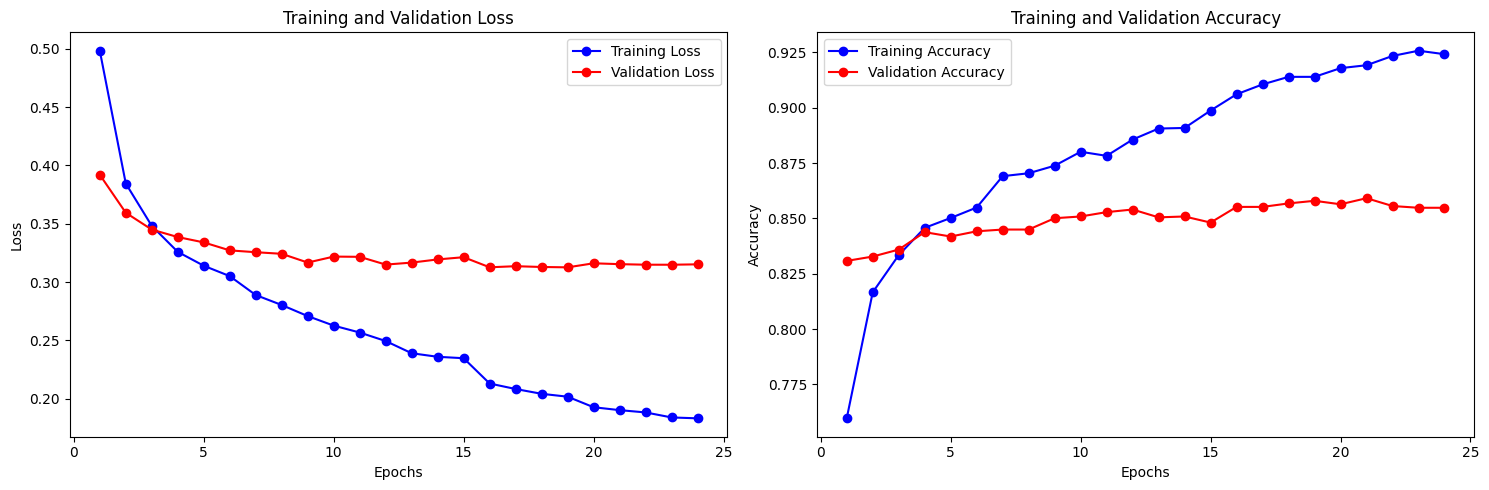

In [38]:
# Retrieve the history of training
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']


epochs = range(1, len(loss) + 1)

# Set up the figure and axis
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot the loss
axs[0].plot(epochs, loss, 'bo-', label='Training Loss')
axs[0].plot(epochs, val_loss, 'ro-', label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot the accuracy
axs[1].plot(epochs, accuracy, 'bo-', label='Training Accuracy')
axs[1].plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

In [39]:
### Voting ###
# Initialize individual models
rf = RandomForestClassifier(random_state=42, n_estimators= 100, max_depth= None)
gbm = GradientBoostingClassifier(random_state=42, learning_rate= 0.1, max_depth= 7, n_estimators= 50)
xgb = XGBClassifier(random_state=42, max_depth= 7, n_estimators= 100)

# Initialize the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('random forest', rf),
    ('GradientBoost', gbm),
    ('XGB', xgb)
], voting='soft')  # 'soft' voting uses predicted probabilities to vote

# Fit the Voting Classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the validation set
y_voting_val_pred = voting_clf.predict(X_val)

# Calculate the validation accuracy
val_voting_accuracy = accuracy_score(y_val, y_voting_val_pred)
print(f"Validation Accuracy: {val_voting_accuracy:.3%}")

Validation Accuracy: 88.902%


In [40]:
### Stacking ###
# Define the base models
base_models = [
    ('random forest', rf),
    ('GradientBoost', gbm),
    ('XGB', xgb)
]

# Define the meta-classifier
meta_classifier = RandomForestClassifier(random_state=42, n_estimators= 150, max_depth= 3)

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_classifier, cv=5)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions on the validation set
y_stacking_val_pred = stacking_clf.predict(X_val)
val_stacking_accuracy = accuracy_score(y_val, y_stacking_val_pred)

# Output the validation accuracy
print(f"Validation Accuracy: {val_stacking_accuracy:.3%}")

Validation Accuracy: 89.807%


# Evaluation

In [41]:
def calculate_metrics(y_true, y_pred, y_prob, model_name):
    accuracy = accuracy_score(y_true, y_pred)

    # Handle binary and multiclass cases for AUC
    if y_prob.ndim == 1 or y_prob.shape[1] == 1:  # Binary classification with one probability column
        auc = roc_auc_score(y_true, y_prob)
    elif y_prob.shape[1] == 2:  # Binary classification with two probability columns
        auc = roc_auc_score(y_true, y_prob[:, 1])  # Use probabilities of the positive class
    else:  # Multiclass classification case
        y_true_binarized = label_binarize(y_true, classes=np.arange(y_prob.shape[1]))
        auc = roc_auc_score(y_true_binarized, y_prob, multi_class='ovr')

    recall = recall_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return {
        'Model': model_name,
        'Accuracy': round(accuracy, 2),
        'AUC': round(auc, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1 Score': round(f1, 2)
    }

    # Your existing code follows, which is correct given this adjustment
metrics_list = []

# Logistic Regression
y_lr_val_prob = log_lr.predict_proba(X_val_scaled)
metrics_list.append(calculate_metrics(y_val, y_lr_val_pred, y_lr_val_prob, 'Logistic Regression'))

# SVC
y_svc_val_prob = svc_or.predict_proba(X_val_scaled)
metrics_list.append(calculate_metrics(y_val, y_svc_val_pred, y_svc_val_prob, 'SVC'))

# K-Nearest Neighbors
y_knn_val_prob = grid_search_knn.predict_proba(X_val_scaled)
metrics_list.append(calculate_metrics(y_val, y_knn_val_pred, y_knn_val_prob, 'K-Nearest Neighbors'))

# GaussianNB
y_gnb_val_prob = gnb.predict_proba(X_val_scaled)
metrics_list.append(calculate_metrics(y_val, y_gnb_val_pred, y_gnb_val_prob, 'GaussianNB'))

# Decision Tree
y_dt_val_prob = grid_search_dt.predict_proba(X_val)
metrics_list.append(calculate_metrics(y_val, y_dt_val_pred, y_dt_val_prob, 'Decision Tree'))

# Random Forest
y_rf_val_prob = grid_search_rf.predict_proba(X_val)
metrics_list.append(calculate_metrics(y_val, y_rf_val_pred, y_rf_val_prob, 'Random Forest'))

# Gradient Boosting Machine
y_gbm_val_prob = grid_search_gbm.predict_proba(X_val)
metrics_list.append(calculate_metrics(y_val, y_gbm_val_pred, y_gbm_val_prob, 'Gradient Boosting Machine'))

# AdaBoost
y_ada_val_prob = grid_search_ada.predict_proba(X_val)
metrics_list.append(calculate_metrics(y_val, y_ada_val_pred, y_ada_val_prob, 'AdaBoost'))


# Neural Network (Keras)
y_nn_val_prob = model.predict(X_val_scaled).flatten()  # Flatten to make it 1D if necessary
y_nn_val_pred = (y_nn_val_prob > 0.5).astype(int)  # Convert probabilities to class labels
metrics_list.append(calculate_metrics(y_val, y_nn_val_pred, y_nn_val_prob, 'Neural Network'))

# Voting
y_voting_val_prob = voting_clf.predict_proba(X_val)
metrics_list.append(calculate_metrics(y_val, y_voting_val_pred, y_voting_val_prob, 'Voting'))

# Stacking
y_stacking_val_prob = stacking_clf.predict_proba(X_val)
metrics_list.append(calculate_metrics(y_val, y_stacking_val_pred, y_stacking_val_prob, 'Stacking'))

# Create DataFrame
metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                        Model  Accuracy   AUC  Precision  Recall  F1 Score
0         Logistic Regression      0.83  0.92       0.83    0.83      0.83
1                         SVC      0.85  0.92       0.85    0.85      0.85
2         K-Nearest Neighbors      0.83  0.91       0.83    0.83      0.83
3                  GaussianNB      0.77  0.83       0.77    0.77      0.76
4               Decision Tree      0.83  0.88       0.84    0.83      0.83
5               Random Forest      0.88  0.96       0.88    0.88      0.88
6   Gradient Boosting Machine      0.89  0.97       0.89    0.89      0.89
7                    AdaBoost      0.88  0.95       0.88    0.88      0.88
8              Neural Network      0.86  0.94       0.86    0.86      0.86
9                      Voting      0.89  0.97       0.89    0.89      0.89
10                   Stacking      0.90  0.97       0.90    0.90      0.90
